In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### define the sample size

In [124]:
#define the sample size
N = 500
D = 2
M = 4
K = 3

In [125]:
X1 = np.random.rand(N,D) + np.array([2,0])
X2 = np.random.rand(N,D) + np.array([2,-2])
X3 = np.random.rand(N,D) + np.array([-2,2])

In [126]:
# X = np.vstack([X1,X2,X3])
X = np.vstack((X1,X2,X3))

In [127]:
Y = np.array([0]*N+[1]*N+[2]*N)

In [128]:
T = np.zeros((X.shape[0],K))
for i in range(K):
    T[N*i:N*(i+1),i]  = 1

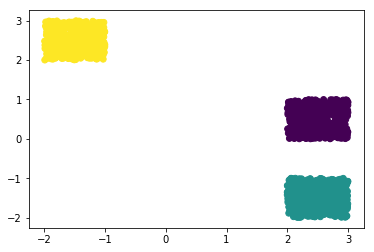

In [129]:
plt.scatter(X[:,0],X[:,1],c = Y)

### prepare for tf

In [130]:
def my_W(shape):
    return tf.Variable(tf.random_normal(shape,stddev = 0.1))

In [131]:
def my_forward(x,w1,b1,w2,b2):
    """
    w1,w2 is to hidden, w2,b2 is to output
    """
    z = tf.sigmoid(tf.matmul(x,w1)+b1)
    return tf.matmul(z,w2)+ b2

In [132]:
W1 = my_W([D,M])
b1 = my_W([M])
W2 = my_W([M,K])
b2 = my_W([K])

In [133]:
tx = tf.placeholder(tf.float32,shape=[None,D])
ty = tf.placeholder(tf.float32,shape=[None,K])

In [134]:
f = my_forward(tx,W1,b1,W2,b2)

In [135]:
entrophy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = ty, logits= f)
cost = tf.reduce_mean(entrophy)

In [136]:
pre = tf.argmax(f,axis=1)

In [137]:
op = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

### run the sess

In [138]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [139]:
for i in range(1000):
    sess.run(op,feed_dict={tx:X,ty:T})
    p = sess.run(pre ,feed_dict={tx:X,ty:T})
    if i % 100 == 0:
        print("accuracy is: "+str(np.mean(p==Y)))

accuracy is: 0.3333333333333333
accuracy is: 0.688
accuracy is: 0.6666666666666666
accuracy is: 0.6666666666666666
accuracy is: 0.7386666666666667
accuracy is: 0.8966666666666666
accuracy is: 0.9993333333333333
accuracy is: 1.0
accuracy is: 1.0
accuracy is: 1.0
